<a href="https://colab.research.google.com/github/Hendrickvk/HouseRegression/blob/main/Modelo1_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook Inicial: Construção do MODEL1 com o Ames Housing Dataset

Desenvolver um modelo de regressão linear múltipla (MODEL1) para prever o preço de venda de imóveis residenciais em Ames, Iowa, utilizando o conjunto de dados Ames Housing.​

Regras:
1. Utilizar apenas transformações de potência nas variáveis originais (ex: log, raiz quadrada, quadrado, inverso).

2. Não é permitido criar variáveis de interação (ex: x1 * x2).

3. Cada variável pode ser usada apenas uma vez na equação (se usar x², não usar x).

4. É permitido eliminar pontos de dados considerados inadequados (outliers).

5. O modelo deve conter pelo menos 6 variáveis.

6. O R² do modelo deve ser, no mínimo, 73%.​

Etapas da Atividade:
Análise Exploratória dos Dados (EDA)

Carregar o conjunto de dados Ames Housing.

Identificar variáveis com forte correlação com o preço de venda (SalePrice).

Visualizar distribuições e relações entre variáveis.​

Pré-processamento:

Aplicar transformações apropriadas às variáveis (ex: log(SalePrice), sqrt(GrLivArea)).

Tratar valores ausentes e outliers.

Codificar variáveis categóricas, se necessário.​
nycdatascience.com

Construção do Modelo:

Selecionar pelo menos 6 variáveis preditoras, aplicando as transformações permitidas.

Ajustar o modelo de regressão linear múltipla.

Avaliar o desempenho do modelo (R², RMSE).​

Validação e Interpretação:

Verificar as suposições do modelo (normalidade dos resíduos, homocedasticidade, multicolinearidade).

Interpretar os coeficientes das variáveis.

Discutir possíveis melhorias e limitações do modelo.​

Entrega:
Relatório contendo:

Descrição do processo de EDA e pré-processamento.

Especificação do modelo final com as variáveis selecionadas e suas transformações.

Métricas de desempenho do modelo.

Interpretação dos resultados.



1. Importação das Bibliotecas Necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

2. Carregamento do Conjunto de Dados

O conjunto de dados pode ser obtido a partir do artigo original de De Cock (2011) ou de repositórios como o Kaggle. Certifique-se de ter o arquivo AmesHousing.csv no mesmo diretório do notebook ou forneça o caminho correto para o arquivo.

In [ ]:
import kagglehub



In [ ]:
# Carregar os dados
df = pd.read_csv('train.csv')

kitchen_mapping={

    "Ex":5,
    "Gd":4,
    "TA":3,
    "Fa":2,
    "Po":1
}

df["KitchenQualNum"] = df["KitchenQual"].map(kitchen_mapping)

# Visualizar as primeiras linhas
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,KitchenQualNum
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,4
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4


3. Análise Exploratória dos Dados (EDA)
Antes de construir o modelo, é fundamental entender a estrutura dos dados e identificar variáveis relevantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotFrontage     1201 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   object 
 6   Alley           91 non-null     object 
 7   LotShape        1460 non-null   object 
 8   LandContour     1460 non-null   object 
 9   Utilities       1460 non-null   object 
 10  LotConfig       1460 non-null   object 
 11  LandSlope       1460 non-null   object 
 12  Neighborhood    1460 non-null   object 
 13  Condition1      1460 non-null   object 
 14  Condition2      1460 non-null   object 
 15  BldgType        1460 non-null   object 
 16  HouseStyle      1460 non-null   object 
 17  OverallQual     1460 non-null   i

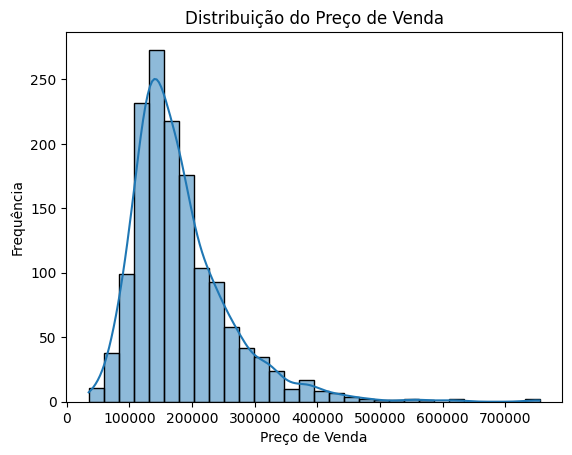

In [ ]:
# Verificar informações gerais do conjunto de dados
df.info()

# Estatísticas descritivas
df.describe()

# Verificar valores ausentes
df.isnull().sum().sort_values(ascending=False).head(20)

# Visualizar a distribuição do preço de venda
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

4. Pré-processamento dos Dados
Aplicar transformações permitidas (log, raiz quadrada, quadrado, inverso) e tratar valores ausentes.

In [ ]:
# Exemplo: Aplicar log na variável alvo
#df['Log_SalePrice'] = np.log(df['SalePrice'])

# Exemplo: Aplicar raiz quadrada em uma variável preditora
#df['Sqrt_GrLivArea'] = np.sqrt(df['GrLivArea'])

# Tratar valores ausentes (exemplo: preencher com a média)
#df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
#df['PoolArea'] = df['PoolArea'].fillna(df['PoolArea'].mean())
#df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].mean())
#df['FullBath'] = df['FullBath'] * 1000
#df['BedroomAbvGr'] = df['BedroomAbvGr'] * 1000
# Aplicar log na variável alvo
#df['Log_SalePrice'] = np.log(df['SalePrice'])

# Aplicar raiz quadrada em uma variável preditora
#df['Sqrt_GrLivArea'] = np.sqrt(df['Gr Liv Area'])

# Tratar valores ausentes (exemplo: preencher com a média)
#df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)





5. Seleção de Variáveis e Construção do Modelo
Selecionar pelo menos 6 variáveis preditoras, aplicar as transformações necessárias e ajustar o modelo de regressão linear múltipla.​

In [ ]:
# Selecionar variáveis preditoras
#features = ['LotFrontage', 'Overall Qual', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Full Bath']
#features =  ['LotFrontage', 'KitchenAbvGr','GarageCars','FullBath', 'BedroomAbvGr','LotArea']
features =  ['MoSold','OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF', 'YearBuilt','KitchenQualNum','1stFlrSF', 'YrSold','MiscVal','3SsnPorch']

print(features)

['MoSold', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'KitchenQualNum', '1stFlrSF', 'YrSold', 'MiscVal', '3SsnPorch']


In [ ]:
# Definir X e y
X = df[features]
#y = df['Log_SalePrice']
y = df['SalePrice']
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [ ]:
print(y.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)

# Fit the model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
print("Primeiras previsões na amostra:", model.predict(X_train.head()))


Primeiras previsões na amostra: [145000. 178000.  85000. 175000. 127000.]


In [ ]:
# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')


R²: 0.8058
RMSE: 38594.8314


Validação do Modelo
Você precisará avaliar quase todos os modelos que construir. Na maioria das aplicações (embora não em todas), a medida relevante da qualidade do modelo é a precisão preditiva. Em outras palavras, as previsões do modelo serão próximas do que realmente acontece?

Mean Absolute Error (MAE)
Se uma casa custou 150.000 e você previu que custaria 100.000, o erro é de 50.000. A métrica MAE calcula o valor absoluto de cada erro. Depois, a média desses erros absolutos. Em média, as previsões estão erradas em cerca de X.

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = model.predict(X)
maetrain = mean_absolute_error(y, predicted_home_prices)

test_predictions = model.predict(X_test)
maetest = mean_absolute_error(y_test, test_predictions)

print(f'MAE treinamento: {maetrain:.4f}')
print(f'MAE teste: {maetest:.4f}')





MAE treinamento: 4983.9432
MAE teste: 24859.6712


O que representa estes erros? Como podemos melhorar o modelo? Vamos mudar o método de regressão?